# **Load** **Datasets**

In [0]:
# Load pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas 
import geopandas as gpd

In [0]:
#load the geocodes National datasets
facilities = pd.read_csv('/content/MFL_geocodes National.csv', encoding = 'latin-1')

In [0]:
# load the population per county dataset
pop = pd.read_csv('/content/2019-population_census-report-per-county.csv')


In [0]:
#load the health officers dataset
officers = pd.read_csv('/content/No of staff cadres per counties 2019.csv')

# **Exploration**

In [0]:
facilities.head()

,Fac_Code,Fac_Name,Fac_Type,Fac_Owner,Fac_County,Fac_District,Fac_Division,Fac_Location,Fac_SubLocation,ns1:space,Fac_Constituency,Fac_Nearesttown,Fac_KEPHlevel,Fac_Latitude,Fac_Longitude,Fac_GEOSource,Fac_GEOMethod,Fac_GeoDate,Fac_AddressBox,ns1:space2,Fac_AddressTown,Fac_BedsNo,Fac_CotsNo,Fac_Open24hours,Fac_OpenWeekends,Fac_OfficialName,Fac_ActiveStatus,ApprovedDate,Fac_LocationDescription,Fac_AddressPostCode,Fac_OfficialMobile,ns1:space3,Fac_OfficialEmail,ns1:space4,Fac_PlotNO,Fac_OfficalLandline,ns1:space5,Fac_OfficialFax,ns1:space6
0,16548.0,Mwachande Medical Clinic,Medical Clinic,Private Enterprise (Institution),Kwale,Msambweni,Msambweni,Mivumoni,Mafisini,NaN,MSAMBWENI,Msambweni,Level 2,-4.462280,39.377900,SARAM 2013,Taken with GPS Device,2013-04-12T00:00:00+03:00,8,NaN,Msambweni,0.0,0.0,0.0,0.0,Mwachande Medical Clinic,Operational,2014-04-04T16:55:34.873+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20222.0,Kakong Dispensary,Dispensary,Ministry of Health,Turkana,Turkana South,Kainuk,Kainuk,Kakong,NaN,TURKANA SOUTH,Kainuk,Level 2,2.021700,35.525710,DHRIO,Taken with GPS Device,2014-04-03T00:00:00+03:00,18,NaN,Lodwar,0.0,0.0,0.0,0.0,Kakong Dispensary,Operational,2014-04-04T09:43:57.107+03:00,Located between Kainuk and Kalemungorok Market...,30500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20221.0,Yoef Mediacl Clinic,Medical Clinic,Private Practice - General Practitioner,Kisumu,Kisumu East,Winam,Manyatta B,Pembe Tatu,NaN,KISUMU TOWN EAST,Kibuye Market-Kisumu Kakamega Road,Level 2,-0.099735,34.765903,DHMT,Taken with GPS Device,2014-04-03T00:00:00+03:00,161,NaN,Kisumu,0.0,0.0,0.0,1.0,Yoef Medical Clinic,Operational,2014-04-04T09:43:13.38+03:00,NaN,40100,0712509222,NaN,ckidiga@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN
3,20220.0,Everest Health Care(Mwingi Central),Medical Clinic,Private Practice - Clinical Officer,Kitui,Mwingi Central,Central,Mwingi,Mwingi,NaN,MWINGI SOUTH,Mwingi Town,Level 2,-0.934610,38.056190,DHRIO,Taken with GPS Device,2014-04-02T00:00:00+03:00,16,NaN,Mwingi,0.0,0.0,0.0,1.0,Everest Health Care (Mwingi central),Operational,2014-04-03T10:35:07.917+03:00,Located opposite Beta Bakers Depot,90400,0723308504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18496.0,Pendo Medical Clinic,Medical Clinic,Private Practice - Clinical Officer,Kwale,Msambweni,Diani,Diani,Gombato,NaN,MSAMBWENI,Ukunda,Level 2,-4.280580,39.567250,DHMT,Taken with GPS Device,2013-04-10T00:00:00+03:00,1769,NaN,Ukunda,4.0,0.0,1.0,1.0,Pendo Medical Clinic,Operational,2014-04-03T10:34:57.35+03:00,A Long Lunga Lunga Mombasa Road,80400,NaN,NaN,nzolendeme@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
pop.head()

,County,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019
0,Baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13
1,Bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23
2,Bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35
3,Busia,"893,681","426,252","467,401","198,152",5,"1,696",527,"488,075","405,606",28
4,Elgeyo-Marakwet,"454,480","227,317","227,151","99,861",5,"3,032",150,"369,998","84,482",12


In [0]:
officers.head()

,Counties,Clinical Officers,Community Health Assistant,Dentists,Doctors,Health Records and Information,Lab,Nursing,Nutrition Officers,Nutritionists,Other Cadres,Pharmacists,Physiotherapists,Public Health Officers,Public Health Technicians,sss,VCT Counselors,Grand Total
0,Baringo,75,NaN,6.0,33,12.0,34,420,2.0,17.0,195,15,4.0,52,104,NaN,2.0,973
1,Bomet,54,NaN,2.0,45,11.0,31,261,2.0,6.0,98,10,4.0,27,74,NaN,39.0,672
2,Bungoma,116,NaN,9.0,72,23.0,77,671,6.0,10.0,167,36,12.0,70,56,2.0,1.0,1386
3,Busia,50,NaN,4.0,35,10.0,40,344,NaN,7.0,115,11,7.0,27,48,NaN,2.0,702
4,Keiyo-Marakwet,86,NaN,4.0,25,20.0,31,377,1.0,15.0,95,14,7.0,45,77,NaN,NaN,823


In [0]:
# information about the medical dataset
facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9571 entries, 0 to 9570
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fac_Code                 9569 non-null   float64
 1   Fac_Name                 9569 non-null   object 
 2   Fac_Type                 9569 non-null   object 
 3   Fac_Owner                9569 non-null   object 
 4   Fac_County               9569 non-null   object 
 5   Fac_District             9569 non-null   object 
 6   Fac_Division             9378 non-null   object 
 7   Fac_Location             9181 non-null   object 
 8   Fac_SubLocation          8803 non-null   object 
 9   ns1:space                1 non-null      object 
 10  Fac_Constituency         9571 non-null   object 
 11  Fac_Nearesttown          9080 non-null   object 
 12  Fac_KEPHlevel            9569 non-null   object 
 13  Fac_Latitude             9292 non-null   float64
 14  Fac_Longitude           

In [0]:
# Info on the population dataset
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   County                    47 non-null     object
 1   Total_Population19        47 non-null     object
 2   Male populatio 2019       47 non-null     object
 3   Female population 2019    47 non-null     object
 4   Households                47 non-null     object
 5   Av_HH_Size                47 non-null     int64 
 6   LandArea                  47 non-null     object
 7   Population Density        47 non-null     object
 8   Population in 2009        47 non-null     object
 9   Pop_change                47 non-null     object
 10  Intersex population 2019  47 non-null     int64 
dtypes: int64(2), object(9)
memory usage: 4.2+ KB


In [0]:
officers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Counties                        49 non-null     object 
 1   Clinical Officers               49 non-null     int64  
 2   Community Health Assistant      4 non-null      float64
 3   Dentists                        47 non-null     float64
 4   Doctors                         49 non-null     int64  
 5   Health Records and Information  48 non-null     float64
 6   Lab                             49 non-null     int64  
 7   Nursing                         49 non-null     int64  
 8   Nutrition Officers              19 non-null     float64
 9   Nutritionists                   48 non-null     float64
 10  Other Cadres                    49 non-null     int64  
 11  Pharmacists                     49 non-null     int64  
 12  Physiotherapists                48 non

# **Data Cleaning**

In [0]:
# put the column names to lower case
facilities.columns = facilities.columns.str.lower()

pop.columns = pop.columns.str.lower()

officers.columns = officers.columns.str.lower()

In [0]:
#merge datasets

medics = facilities.merge(pop, how ='left',left_on ='fac_county', right_on = 'county').merge(officers, how = 'left',left_on = 'county',right_on='counties')
medics.tail()

,fac_code,fac_name,fac_type,fac_owner,fac_county,fac_district,fac_division,fac_location,fac_sublocation,ns1:space,fac_constituency,fac_nearesttown,fac_kephlevel,fac_latitude,fac_longitude,fac_geosource,fac_geomethod,fac_geodate,fac_addressbox,ns1:space2,fac_addresstown,fac_bedsno,fac_cotsno,fac_open24hours,fac_openweekends,fac_officialname,fac_activestatus,approveddate,fac_locationdescription,fac_addresspostcode,fac_officialmobile,ns1:space3,fac_officialemail,ns1:space4,fac_plotno,fac_officallandline,ns1:space5,fac_officialfax,ns1:space6,county,total_population19,male populatio 2019,female population 2019,households,av_hh_size,landarea,population density,population in 2009,pop_change,intersex population 2019,counties,clinical officers,community health assistant,dentists,doctors,health records and information,lab,nursing,nutrition officers,nutritionists,other cadres,pharmacists,physiotherapists,public health officers,public health technicians,sss,vct counselors,grand total
9566,10263.0,Githiga Health Centre,Health Centre,Ministry of Health,Kiambu,Githunguri,Githunguri,Githiga,Githiga,NaN,GITHUNGURI,Githunguri,Level 3,-1.08300,36.74620,KEMRI GIS MERGE,"Calc from proximity to school, village,markets",2009-07-14T00:00:00+03:00,P.O. Box 39,NaN,Kiambu,16.0,NaN,0.0,0.0,Githiga Health Centre,Operational,NaN,NaN,OO9OO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kiambu,"2,417,735","1,187,146","1,230,454","795,241",3.0,"2,539",952,"1,623,282","794,453",135.0,Kiambu,132.0,NaN,13.0,133.0,22.0,58.0,782.0,NaN,25.0,242.0,40.0,21.0,84.0,108.0,NaN,6.0,1686.0
9567,10203.0,Gakurwe Dispensary,Dispensary,Ministry of Health,Murang'a,Kiharu,Kiharu,Gaturi,Gathukiini,NaN,KIHARU,Muranga,Level 2,-0.62769,37.01610,KEMRI GIS MERGE,"Calc from proximity to school, village,markets",2009-07-14T00:00:00+03:00,P.O. Box 69,NaN,Murang'A,NaN,NaN,0.0,0.0,Gakurwe Dispensary,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Murang'a,"1,056,640","523,940","532,669","318,105",3.0,"2,524",419,"942,581","114,059",31.0,Murang'a,53.0,NaN,5.0,46.0,14.0,39.0,467.0,1.0,8.0,142.0,17.0,9.0,46.0,75.0,NaN,3.0,925.0
9568,10189.0,GK Prison Dispensary,Dispensary,Ministry of Health,Nyandarua,Nyandarua North,Municipality,Nyahururu,Nyahururu,NaN,LAIKIPIA WEST,Nyahururu,Level 2,0.03212,36.42123,KEMRI GIS MERGE,"Calc from proximity to school, village,markets",2009-07-14T00:00:00+03:00,P.O. Box 239,NaN,Nyahururu,NaN,NaN,0.0,0.0,GK Prison Dispensary,Operational,NaN,NaN,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nyandarua,"638,289","315,022","323,247","179,686",4.0,"3,286",194,"596,268","42,021",20.0,Nyandarua,48.0,NaN,4.0,35.0,11.0,40.0,324.0,NaN,7.0,99.0,13.0,8.0,35.0,49.0,NaN,5.0,710.0
9569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,THARAKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAVAKHOLO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Drop columns we dont need for Analysis 
medics.drop(['ns1:space','ns1:space2','ns1:space3','ns1:space4','ns1:space5','ns1:space6','households','av_hh_size','landarea','population density','population in 2009','pop_change','intersex population 2019'],axis =1, inplace = True)
medics.drop(['fac_locationdescription','fac_officialmobile','fac_officialemail','fac_plotno','fac_officallandline','fac_officialfax','fac_addressbox','fac_addresstown','fac_addresspostcode','male populatio 2019','female population 2019'],axis = 1, inplace = True)
medics.drop(['county','counties','fac_division','fac_location','fac_sublocation','fac_constituency','fac_nearesttown','fac_geosource','fac_geomethod','fac_geodate','community health assistant','dentists','health records and information','lab','nursing','nutrition officers','nutritionists','other cadres','pharmacists','physiotherapists','public health officers','public health technicians','sss','vct counselors','grand total'],axis=1,inplace=True)

In [0]:
medics.head(5)

,fac_code,fac_name,fac_type,fac_owner,fac_county,fac_district,fac_kephlevel,fac_latitude,fac_longitude,fac_bedsno,fac_cotsno,fac_open24hours,fac_openweekends,fac_officialname,fac_activestatus,approveddate,total_population19,clinical officers,doctors
0,16548.0,Mwachande Medical Clinic,Medical Clinic,Private Enterprise (Institution),Kwale,Msambweni,Level 2,-4.462280,39.377900,0.0,0.0,0.0,0.0,Mwachande Medical Clinic,Operational,2014-04-04T16:55:34.873+03:00,"866,820",60.0,9.0
1,20222.0,Kakong Dispensary,Dispensary,Ministry of Health,Turkana,Turkana South,Level 2,2.021700,35.525710,0.0,0.0,0.0,0.0,Kakong Dispensary,Operational,2014-04-04T09:43:57.107+03:00,"926,976",36.0,13.0
2,20221.0,Yoef Mediacl Clinic,Medical Clinic,Private Practice - General Practitioner,Kisumu,Kisumu East,Level 2,-0.099735,34.765903,0.0,0.0,0.0,1.0,Yoef Medical Clinic,Operational,2014-04-04T09:43:13.38+03:00,"1,155,574",114.0,121.0
3,20220.0,Everest Health Care(Mwingi Central),Medical Clinic,Private Practice - Clinical Officer,Kitui,Mwingi Central,Level 2,-0.934610,38.056190,0.0,0.0,0.0,1.0,Everest Health Care (Mwingi central),Operational,2014-04-03T10:35:07.917+03:00,"1,136,187",56.0,50.0
4,18496.0,Pendo Medical Clinic,Medical Clinic,Private Practice - Clinical Officer,Kwale,Msambweni,Level 2,-4.280580,39.567250,4.0,0.0,1.0,1.0,Pendo Medical Clinic,Operational,2014-04-03T10:34:57.35+03:00,"866,820",60.0,9.0


In [0]:
# remove all the whitespaces
for x in medics.columns:
  if medics[x].dtypes == 'object':
    medics[x] = medics[x].str.strip()

In [0]:
#check for null values 
medics.isnull().any()
medics.isnull().sum()

fac_code                2
fac_name                2
fac_type                2
fac_owner               2
fac_county              2
fac_district            2
fac_kephlevel           2
fac_latitude          279
fac_longitude         279
fac_bedsno            120
fac_cotsno            111
fac_open24hours         2
fac_openweekends        2
fac_officialname        2
fac_activestatus        2
approveddate          342
total_population19    247
clinical officers     247
doctors               247
dtype: int64

In [0]:
# drop rows where latitude and longitude are null
ldrop = medics[(medics['fac_latitude'].isnull()) | (medics['fac_longitude'].isnull())].index
medics.drop(ldrop,inplace= True)

In [0]:
#drop rows where population is null
popnull = medics[medics['total_population19'].isnull()].index
medics.drop(popnull,inplace=True)

In [0]:
#fill null values
medics.fillna(0, inplace=True)

In [0]:
#check for null values
medics.isnull().sum()

fac_code              0
fac_name              0
fac_type              0
fac_owner             0
fac_county            0
fac_district          0
fac_kephlevel         0
fac_latitude          0
fac_longitude         0
fac_bedsno            0
fac_cotsno            0
fac_open24hours       0
fac_openweekends      0
fac_officialname      0
fac_activestatus      0
approveddate          0
total_population19    0
clinical officers     0
doctors               0
dtype: int64

In [0]:
# check for duplicates
medics.duplicated().sum()

0

In [0]:
#rename the columns
medics.columns = ['fac_code', 'fac_name', 'fac_type', 'fac_owner', 'fac_county',
       'fac_district', 'fac_kephlevel', 'fac_latitude', 'fac_longitude',
       'fac_bedsno', 'fac_cotsno', 'fac_open24hours', 'fac_openweekends',
       'fac_officialname', 'fac_activestatus', 'approveddate',
       'total_population', 'clinical officers', 'doctors']

In [0]:
# standardization of the column names
medics.columns = medics.columns.str.replace(" ","_")

In [0]:
# Data type conversion

medics.approveddate = pd.to_datetime(medics.approveddate)
medics['total_population'] = medics['total_population'].str.replace(",","").astype('int')

In [0]:
medics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9051 entries, 0 to 9568
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype                                
---  ------             --------------  -----                                
 0   fac_code           9051 non-null   float64                              
 1   fac_name           9051 non-null   object                               
 2   fac_type           9051 non-null   object                               
 3   fac_owner          9051 non-null   object                               
 4   fac_county         9051 non-null   object                               
 5   fac_district       9051 non-null   object                               
 6   fac_kephlevel      9051 non-null   object                               
 7   fac_latitude       9051 non-null   float64                              
 8   fac_longitude      9051 non-null   float64                              
 9   fac_bedsno         9051 non-nu

# Export Data To Csv

In [0]:
medics.to_csv('medics_clean.csv')

# Analysis

In [0]:
#Install geopandas for creating geodataframes 
#Matplotlib for plotting
#palettable for styling
#!pip install geopandas 

import geopandas as gpd
import matplotlib.pyplot as plt
import palettable as pltt
from seaborn import palplot
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


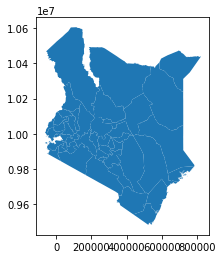

In [0]:
# Map Counties
KenyaCounties= gpd.read_file("KenyaCounties.shp")
KenyaCounties.plot()
#ax1 = KenyaCounties.plot(edgecolor='black', facecolor='none')

In [0]:
#Put population inside counties
KenyaCounties.county = KenyaCounties.county.str.lower()
KenyaCounties.head (5)

,county,geometry
0,baringo,"POLYGON ((142106.774 10182922.647, 142167.561 ..."
1,bomet,"POLYGON ((104933.992 9959607.326, 105366.859 9..."
2,bungoma,"POLYGON ((12310.633 10121866.193, 12421.228 10..."
3,busia,"MULTIPOLYGON (((-66738.559 10010902.633, -6680..."
4,elgeyo-marakwet,"POLYGON ((117049.369 10142185.087, 117053.129 ..."


In [0]:
pop.county=pop.county.str.lower()
pop.head ()

,county,total_population19,male populatio 2019,female population 2019,households,av_hh_size,landarea,population density,population in 2009,pop_change,intersex population 2019
0,baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13
1,bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23
2,bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35
3,busia,"893,681","426,252","467,401","198,152",5,"1,696",527,"488,075","405,606",28
4,elgeyo-marakwet,"454,480","227,317","227,151","99,861",5,"3,032",150,"369,998","84,482",12


In [0]:
#Merge Geodataframe with CSV Dataframe
county_pop = KenyaCounties.merge(pop, how='left', left_on="county", right_on="county")
county_pop = county_pop[['county', 'geometry', 'total_population19', 'population density']]
county_pop.head() 

,county,geometry,total_population19,population density
0,baringo,"POLYGON ((142106.774 10182922.647, 142167.561 ...","666,763",61
1,bomet,"POLYGON ((104933.992 9959607.326, 105366.859 9...","875,689",346
2,bungoma,"POLYGON ((12310.633 10121866.193, 12421.228 10...","1,670,570",552
3,busia,"MULTIPOLYGON (((-66738.559 10010902.633, -6680...","893,681",527
4,elgeyo-marakwet,"POLYGON ((117049.369 10142185.087, 117053.129 ...","454,480",150


<function matplotlib.pyplot.show>

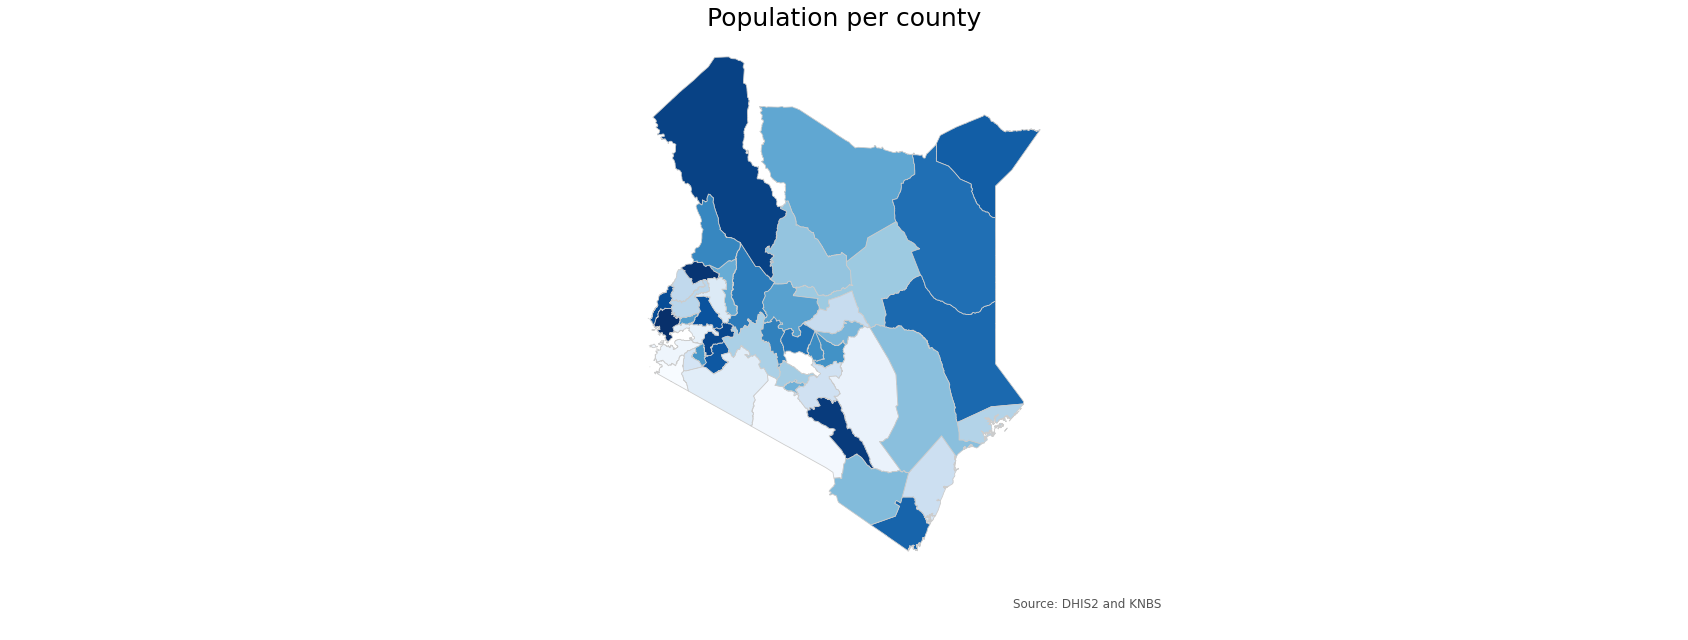

In [0]:
# Select column to be used for visualisation
variable = 'total_population19'
#Set range of the map , this will determine the size of the map
vmin, vmax = 0, 50
#Create figure and axes for matplotlib
f, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
#Add title and set data sources
ax.set_title('Population per county', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: DHIS2 and KNBS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
county_pop.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.axis('equal')
plt.show

In [0]:
#Overlay Medic dataset on Population Map
medics.head(2)

,fac_code,fac_name,fac_type,fac_owner,fac_county,fac_district,fac_kephlevel,fac_latitude,fac_longitude,fac_bedsno,fac_cotsno,fac_open24hours,fac_openweekends,fac_officialname,fac_activestatus,approveddate,total_population,clinical_officers,doctors
0,16548.0,Mwachande Medical Clinic,Medical Clinic,Private Enterprise (Institution),Kwale,Msambweni,Level 2,-4.46228,39.37790,0.0,0.0,0.0,0.0,Mwachande Medical Clinic,Operational,2014-04-04 16:55:34.873000+03:00,866820,60.0,9.0
1,20222.0,Kakong Dispensary,Dispensary,Ministry of Health,Turkana,Turkana South,Level 2,2.02170,35.52571,0.0,0.0,0.0,0.0,Kakong Dispensary,Operational,2014-04-04 09:43:57.107000+03:00,926976,36.0,13.0


In [0]:
# import matplotlib.pyplot as plt
Medics_df=pd.read_csv ('medics_clean.csv', delimiter=',')
Medics_df.head(3)

,Unnamed: 0,fac_code,fac_name,fac_type,fac_owner,fac_county,fac_district,fac_kephlevel,fac_latitude,fac_longitude,fac_bedsno,fac_cotsno,fac_open24hours,fac_openweekends,fac_officialname,fac_activestatus,approveddate,total_population,clinical_officers,doctors
0,0,16548.0,Mwachande Medical Clinic,Medical Clinic,Private Enterprise (Institution),Kwale,Msambweni,Level 2,-4.462280,39.377900,0.0,0.0,0.0,0.0,Mwachande Medical Clinic,Operational,2014-04-04 16:55:34.873000+03:00,866820,60.0,9.0
1,1,20222.0,Kakong Dispensary,Dispensary,Ministry of Health,Turkana,Turkana South,Level 2,2.021700,35.525710,0.0,0.0,0.0,0.0,Kakong Dispensary,Operational,2014-04-04 09:43:57.107000+03:00,926976,36.0,13.0
2,2,20221.0,Yoef Mediacl Clinic,Medical Clinic,Private Practice - General Practitioner,Kisumu,Kisumu East,Level 2,-0.099735,34.765903,0.0,0.0,0.0,1.0,Yoef Medical Clinic,Operational,2014-04-04 09:43:13.380000+03:00,1155574,114.0,121.0


In [0]:
#Checking extent of spread of facilities and convert to .shp
boundingbox= (Medics_df.fac_longitude.min(),
         Medics_df.fac_longitude.max(),      
         Medics_df.fac_latitude.min(),
         Medics_df.fac_latitude.max())
boundingbox
#medics_proj.shp.point(float(longitude),float(latitude))

(-37.12722, 41.88834, -4.66227, 5.44123)

In [0]:
#Find ratio of Dr: patient
#define level of care for counties
#Find ratio of govt hospital vs private

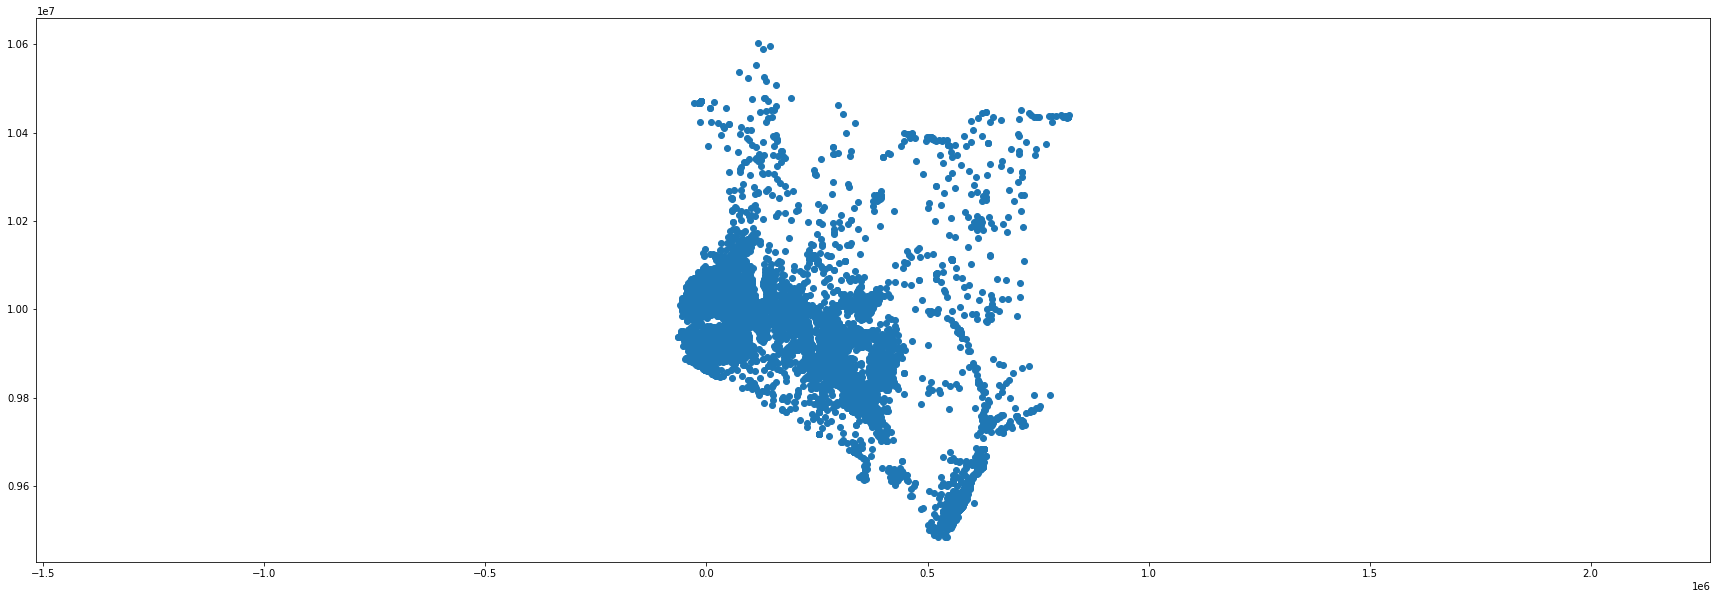

In [0]:
# Plot facilities and Doctors
Medicsfac=gpd.read_file ("medics_proj.shp")
f,ax = plt.subplots (1, figsize =(30,10)) # Set figure and axis
Medicsfac.plot(ax=ax , alpha = 1)
plt.axis('equal')  
#ax.set_axis_off()
plt.show()

In [0]:
# Transform Coordinate reference system
county_pop.crs

<Projected CRS: EPSG:21037>
Name: Arc 1960 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Africa - Kenya and Tanzania - south of equator and east of 36°E
- bounds: (36.0, -11.75, 41.6, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: Arc 1960
- Ellipsoid: Clarke 1880 (RGS)
- Prime Meridian: Greenwich

In [0]:
Medicsfac.crs

<Projected CRS: EPSG:21037>
Name: Arc 1960 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Africa - Kenya and Tanzania - south of equator and east of 36°E
- bounds: (36.0, -11.75, 41.6, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: Arc 1960
- Ellipsoid: Clarke 1880 (RGS)
- Prime Meridian: Greenwich

NameError: ignored

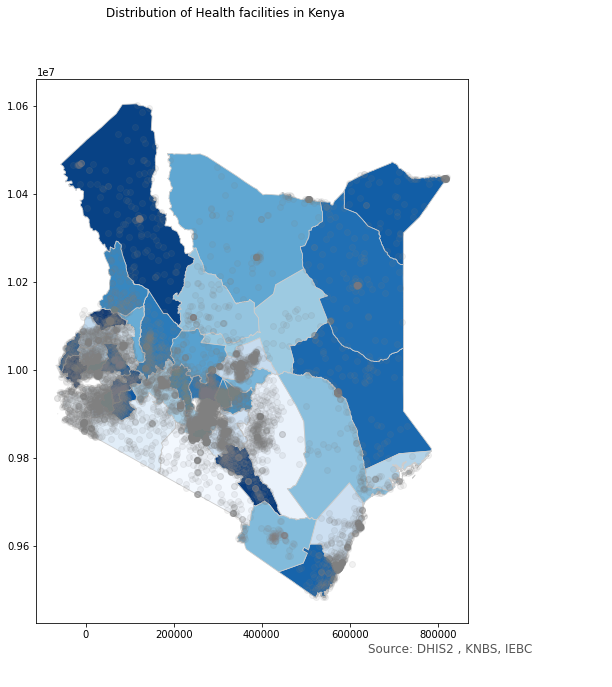

In [0]:
#Combine Population map and Facilities map
f, ax = plt.subplots (1 , figsize= (30,10))
county_pop.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
Medicsfac.plot(ax=ax , color='grey', alpha = 0.1)
f.suptitle ('Distribution of Health facilities in Kenya')
ax.annotate('Source: DHIS2 , KNBS, IEBC', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar (sm)
ax.set_axis_off
plt.show

In [0]:
# Research Question
#How accessible are the health facilities?
buf = Medicsfac.buffer(15000) # Create Buffer
buf.head ()

0    POLYGON ((556827.353 9507062.119, 556755.124 9...
1    POLYGON ((128303.654 10224172.301, 128231.425 ...
2    POLYGON ((43322.943 9989245.610, 43250.714 998...
3    POLYGON ((409889.571 9896982.374, 409817.342 9...
4    POLYGON ((577849.729 9527134.137, 577777.500 9...
dtype: geometry

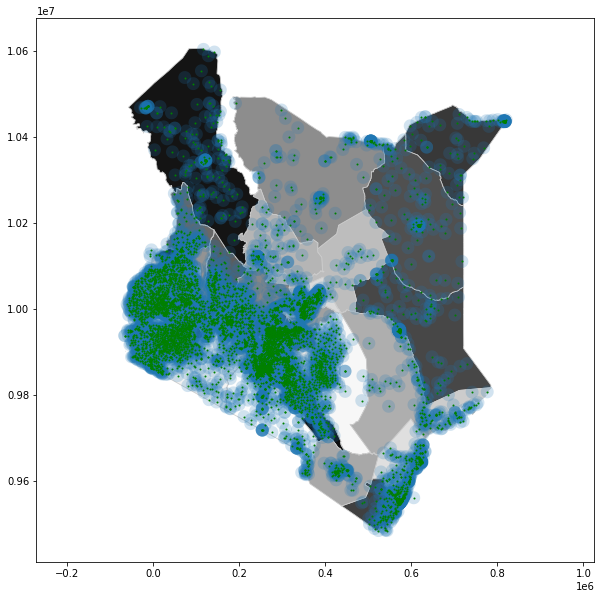

In [0]:
f, ax = plt.subplots (1 , figsize=(10,10))
county_pop.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8')
legend=True
buf.plot (ax=ax, linewidth=5 , alpha=0.2,)
Medicsfac.plot (ax=ax , markersize = 1 , color = 'green')
plt.axis ('equal')
plt.show()


In [0]:
# The Ratio between no. of Health Officers to Population in each County
df = medics[['fac_county', 'total_population', 'clinical_officers', 'doctors']]
df['medics']= df[['clinical_officers','doctors']].sum(axis=1)
df['ratio'] = df['total_population']/df['medics']
df1 = df.sort_values(by='ratio', ascending=False)
df1.drop_duplicates()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fac_county,total_population,clinical_officers,doctors,medics,ratio
6493,Lamu,143920,5.0,1.0,6.0,23986.666667
187,Turkana,926976,36.0,13.0,49.0,18917.877551
1173,Mandera,867457,39.0,12.0,51.0,17008.960784
5018,Narok,1157873,37.0,36.0,73.0,15861.273973
9245,Siaya,993183,46.0,17.0,63.0,15764.809524
2226,Kajiado,1117840,60.0,13.0,73.0,15312.876712
382,Migori,1116436,69.0,18.0,87.0,12832.597701
7780,Kwale,866820,60.0,9.0,69.0,12562.608696
1327,Wajir,781263,57.0,6.0,63.0,12401.000000
6215,Makueni,987653,46.0,38.0,84.0,11757.773810


In [0]:
match_counties = df[(df.ratio <= 1000)]
match_counties
#df.info()

,fac_county,total_population,clinical_officers,doctors,medics,ratio


In [0]:
# Number of Private and Government owned Facilities per County
owner=medics[['fac_county','fac_owner']]
private = 'Private'
government = 'Ministry'

government_owned = owner[owner['fac_owner'].astype(str).str.contains(government, regex=False, na=False)]
table = government_owned['fac_owner'].groupby(government_owned['fac_county']).count()
table1 = owner['fac_owner'].groupby(owner['fac_county']).count()
full = pd.concat([table, table1],axis=1)
full

,fac_owner,fac_owner
fac_county,,
Baringo,155,191
Bomet,103,121
Bungoma,88,156
Busia,63,90
Embu,77,161
Garissa,69,145
Homa Bay,137,215
Isiolo,27,46
Kajiado,78,282


In [0]:
private_owned = owner[owner['fac_owner'].astype(str).str.contains(private, regex=False, na=False)]
table = private_owned['fac_owner'].groupby(private_owned['fac_county']).count()
table1 = owner['fac_owner'].groupby(owner['fac_county']).count()
full = pd.concat([table, table1],axis=1)
full

,fac_owner,fac_owner
fac_county,,
Baringo,17,191
Bomet,8,121
Bungoma,35,156
Busia,9,90
Embu,52,161
Garissa,65,145
Homa Bay,29,215
Isiolo,3,46
Kajiado,158,282
